# Import Libraries, Data and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_features = pd.read_csv('train.csv', header=None)
test_features = pd.read_csv('test.csv', header=None)
train_label = pd.read_csv('trainLabels.csv', header=None)

In [3]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
train_label.head()

,0
0,1
1,0
2,0
3,1
4,0


In [5]:
train_label = train_label[0]
type(train_label)

pandas.core.series.Series

In [6]:
print(train_features.shape)
print(train_label.shape)
print(test_features.shape)

(1000, 40)
(1000,)
(9000, 40)


# Feature Scaling

In [7]:
train_features_scaled = train_features.copy()
train_features_scaled[train_features.columns] = train_features[train_features.columns].apply(lambda x: (x - x.min())/(x.max() - x.min()))
test_features[test_features.columns] = test_features[test_features.columns].apply(lambda x: (x - x.min())/(x.max() - x.min()))

# PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(train_features_scaled)
explained_variance = pca.explained_variance_ratio_
print(*explained_variance)

0.0687070214647 0.0559452401934 0.047019077585 0.0388742125789 0.0362220186905 0.034020661229 0.0337183216819 0.0327190934236 0.031360215372 0.0307934317344 0.0297208432464 0.0294796430811 0.0284816322358 0.0278915468657 0.0271613891507 0.0264738319593 0.0260485429576 0.0257483904602 0.0255465135395 0.0251118747832 0.024759166814 0.0235596118032 0.0231982536014 0.0230318320064 0.0223831251532 0.0215557130426 0.0213875131411 0.0203330821398 0.0199948463375 0.0196668688886 0.0189832016686 0.0179362772209 0.0166195077713 0.0139620007652 0.0130581344115 0.0105033971211 0.00802396588072 1.49350448386e-32 1.35500707869e-32 3.30444608659e-33


In [9]:
pca_2 = PCA(n_components=2)
train_features_2 = pca_2.fit_transform(train_features_scaled)

# Model Fitting

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features_scaled, train_label, test_size=0.2)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[86 14]
 [23 77]]
             precision    recall  f1-score   support

          0       0.79      0.86      0.82       100
          1       0.85      0.77      0.81       100

avg / total       0.82      0.81      0.81       200

Scores: 0.8219999999999998 +- (0.025999999999999978)


# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
mean_accuracies = []
# for i in range(1, 250, 10):
for i in range(1, 55, 10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    mean_accuracies.append(accuracies.mean())

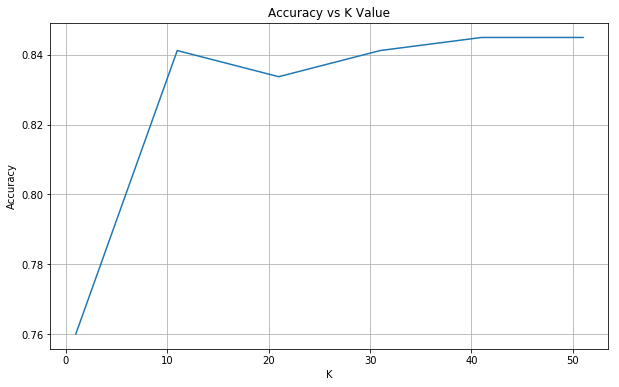

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(range(1, 250, 10), mean_accuracies)
plt.plot(range(1, 55, 10), mean_accuracies)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

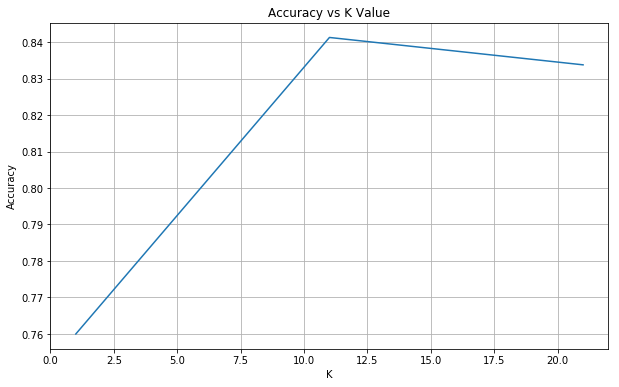

In [14]:
mean_accuracies = []
l=1
u=25
s= 10
for i in range(l, u, s):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    mean_accuracies.append(accuracies.mean())
plt.figure(figsize=(10, 6))

plt.plot(range(l, u, s), mean_accuracies)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [15]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[83 17]
 [16 84]]
             precision    recall  f1-score   support

          0       0.84      0.83      0.83       100
          1       0.83      0.84      0.84       100

avg / total       0.84      0.83      0.83       200

Scores: 0.834 +- (0.02332380757938118)


# SVM

In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[87 13]
 [27 73]]
             precision    recall  f1-score   support

          0       0.76      0.87      0.81       100
          1       0.85      0.73      0.78       100

avg / total       0.81      0.80      0.80       200

Scores: 0.818 +- (0.031240998703626597)


# Grid Search

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}
model = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

BestParameters = model.best_params_
BestEstimator = model.best_estimator_
print(BestParameters)
print(BestEstimator)


[[93  7]
 [19 81]]
             precision    recall  f1-score   support

          0       0.83      0.93      0.88       100
          1       0.92      0.81      0.86       100

avg / total       0.88      0.87      0.87       200

Scores: 0.875 +- (0.02376972864800945)
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Gaussian NB

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[87 13]
 [25 75]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       100
          1       0.85      0.75      0.80       100

avg / total       0.81      0.81      0.81       200

Scores: 0.8160000000000001 +- (0.021540659228537998)


# Multinomial NB

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[74 26]
 [11 89]]
             precision    recall  f1-score   support

          0       0.87      0.74      0.80       100
          1       0.77      0.89      0.83       100

avg / total       0.82      0.81      0.81       200

Scores: 0.8029999999999999 +- (0.03606937759374285)


# Bernoulii NB

In [20]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[  0 100]
 [  0 100]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       100
          1       0.50      1.00      0.67       100

avg / total       0.25      0.50      0.33       200

Scores: 0.5109999999999999 +- (0.0030000000000000027)


D:\Users\Ritvik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

model.fit(train_features_scaled, train_label)
accuracies = cross_val_score(estimator=model, X=train_features_scaled, y=train_label, cv=10)
m_acc = accuracies.mean()
s_acc = accuracies.std()
print("Scores: {} +- ({})".format(m_acc, s_acc))

[[89 11]
 [39 61]]
             precision    recall  f1-score   support

          0       0.70      0.89      0.78       100
          1       0.85      0.61      0.71       100

avg / total       0.77      0.75      0.75       200

Scores: 0.819 +- (0.03047950130825632)


# Making Final Predictions

In [22]:
final_model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
print(final_model)
final_model.fit(train_features_scaled, train_label)
final_predictions = final_model.predict(test_features)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [23]:
id = pd.DataFrame(pd.DataFrame(np.arange(1, 9001, 1), columns=['Id']))
id.head()

,Id
0,1
1,2
2,3
3,4
4,5


In [24]:
pr = pd.DataFrame(pd.DataFrame(final_predictions, columns=['Solution']))
pr.head()

,Solution
0,1
1,0
2,0
3,0
4,0


In [25]:
pd.concat([id, pr], axis=1).to_csv('Predictions.csv', index=False)